### S08 T01: Tasca Feature Engineering

- Exercici 1\
Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.

In [164]:
# for managing, plotting and styling 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for preprocessing and analysing
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [165]:
df = pd.read_csv('athlete_events.csv', index_col='ID')
df.sample(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
46931,He Kexin,F,20.0,142.0,33.0,China,CHN,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Women's Uneven Bars,Silver
40036,Kaies Biu Bannour Ghodhbane,M,20.0,183.0,78.0,Tunisia,TUN,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,NaN
23193,Claudia Corsini,F,30.0,165.0,59.0,Italy,ITA,2008 Summer,2008,Summer,Beijing,Modern Pentathlon,Modern Pentathlon Women's Individual,NaN
31084,Gustaf Peder Wilhelm Dyrssen,M,36.0,NaN,NaN,Sweden,SWE,1928 Summer,1928,Summer,Amsterdam,Fencing,"Fencing Men's epee, Team",NaN
58071,Gustav Kaufmann,M,42.0,172.0,87.0,Liechtenstein,LIE,1960 Summer,1960,Summer,Roma,Shooting,"Shooting Men's Small-Bore Rifle, Three Positio...",NaN


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB


In [167]:
df.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [168]:
df = df.astype(dict((col, 'category') for col in df.columns if col not in ['ID', 'Name'] and df[col].dtype != float))
df.describe(include='category')

,Sex,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,2,1184,230,51,35,2,42,66,765,3
top,M,United States,USA,2000 Summer,1992,Summer,London,Athletics,Football Men's Football,Gold
freq,196594,17847,18853,13821,16413,222552,22426,38624,5733,13372


In [169]:
# getting dummies from categorical atributes 'Sex' and 'Medal'
dum_var = pd.get_dummies(df[['Sex', 'Medal']])
dum_var

,Sex_F,Sex_M,Medal_Bronze,Medal_Gold,Medal_Silver
ID,,,,,
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,1,0
5,1,0,0,0,0
...,...,...,...,...,...
135569,0,1,0,0,0
135570,0,1,0,0,0
135570,0,1,0,0,0


In [170]:
dum_var.shape

(271116, 5)

In [171]:
dum_sport = pd.get_dummies(df[['Sport']])
dum_sport.head(3)

,Sport_Aeronautics,Sport_Alpine Skiing,Sport_Alpinism,Sport_Archery,Sport_Art Competitions,Sport_Athletics,Sport_Badminton,Sport_Baseball,Sport_Basketball,Sport_Basque Pelota,...,Sport_Table Tennis,Sport_Taekwondo,Sport_Tennis,Sport_Trampolining,Sport_Triathlon,Sport_Tug-Of-War,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
# I'm doing 'Sports' dummies apart as I can be not interested on the 
# less practiced (some of them desapeared or just added)  

dum_sport.sum()

Sport_Aeronautics            1
Sport_Alpine Skiing       8829
Sport_Alpinism              25
Sport_Archery             2334
Sport_Art Competitions    3578
                          ... 
Sport_Tug-Of-War           170
Sport_Volleyball          3404
Sport_Water Polo          3846
Sport_Weightlifting       3937
Sport_Wrestling           7154
Length: 66, dtype: int64

In [173]:
# finding the numerical columns and standardizing them ('Year' not included)

numeric = []

for column in df:
    if df[column].dtype == 'float64':
        numeric.append(column)
        
df[numeric]        

,Age,Height,Weight
ID,,,
1,24.0,180.0,80.0
2,23.0,170.0,60.0
3,24.0,NaN,NaN
4,34.0,NaN,NaN
5,21.0,185.0,82.0
...,...,...,...
135569,29.0,179.0,89.0
135570,27.0,176.0,59.0
135570,27.0,176.0,59.0


In [174]:
scaler = StandardScaler()
stand_var = pd.DataFrame(scaler.fit_transform(df[numeric].values))
stand_var.columns = numeric
stand_var.head()

,Age,Height,Weight
0,-0.243511,0.443130,0.648008
1,-0.399918,-0.507582,-0.745916
2,-0.243511,NaN,NaN
3,1.320566,NaN,NaN
4,-0.712734,0.918485,0.787400


In [175]:
stand_var.shape

(271116, 3)

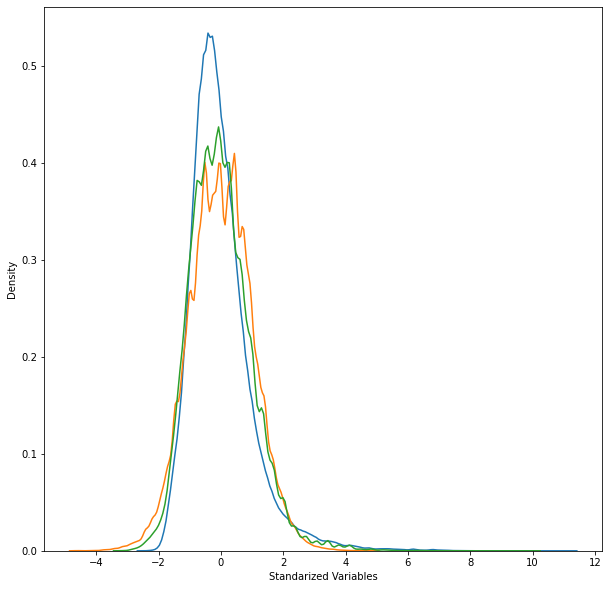

In [176]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
for column in stand_var:
    sns.kdeplot(stand_var[column])
plt.xlabel('Standarized Variables');

- Exercici 2\
Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

In [177]:
pca = PCA(3)
principal_components = pca.fit_transform(stand_var.notna())
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2', 'PC3'])
principal_df

,PC1,PC2,PC3
0,-0.322864,-0.000058,0.004462
1,-0.322864,-0.000058,0.004462
2,1.083074,-0.152081,0.019544
3,1.083074,-0.152081,0.019544
4,-0.322864,-0.000058,0.004462
...,...,...,...
271111,-0.322864,-0.000058,0.004462
271112,-0.322864,-0.000058,0.004462
271113,-0.322864,-0.000058,0.004462
271114,-0.322864,-0.000058,0.004462


In [178]:
principal_df['Sex'] = df['Sex'].values
principal_df.head()

,PC1,PC2,PC3,Sex
0,-0.322864,-0.000058,0.004462,M
1,-0.322864,-0.000058,0.004462,M
2,1.083074,-0.152081,0.019544,M
3,1.083074,-0.152081,0.019544,M
4,-0.322864,-0.000058,0.004462,F


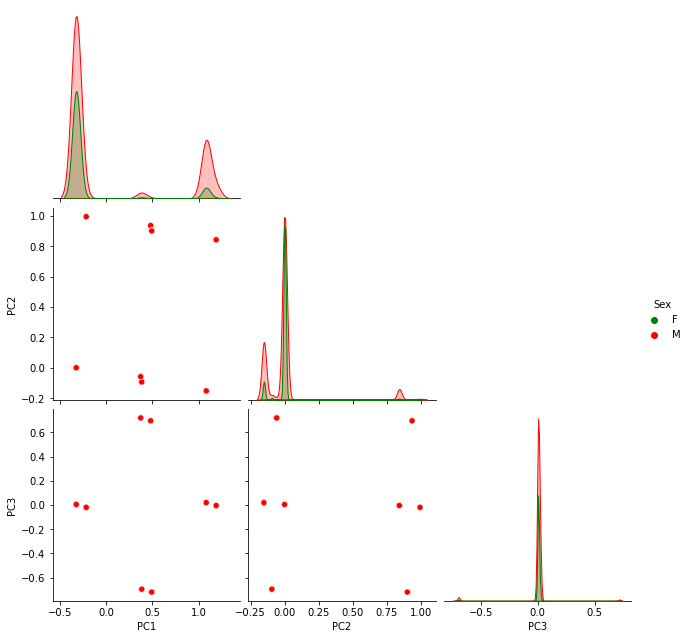

In [179]:
sns.pairplot(principal_df, hue = 'Sex', corner = True, height = 3, palette = {'M':'red', 'F':'green'});

- Exercici 3\
Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

_________

Repositori: Feature engineering